In [91]:
vcb_path = 'D:/UIT/nam3/hk2/phantichdulieukinhdoanh/project/IS403_O22_HTCL_14/Dataset/VCB_2015_2023.csv'
bid_path = 'D:/UIT/nam3/hk2/phantichdulieukinhdoanh/project/IS403_O22_HTCL_14/Dataset/BID_2015_2023.csv'
ctg_path = 'D:/UIT/nam3/hk2/phantichdulieukinhdoanh/project/IS403_O22_HTCL_14/Dataset/CTG_2015_2023.csv'

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## CTG

In [93]:
data = pd.read_csv(ctg_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,9568.436523,9707.109375,9568.436523,9637.772461,9637.772461,87241
1,2015-01-06,9637.772461,9915.118164,9568.436523,9707.109375,9707.109375,180293
2,2015-01-07,9707.109375,10053.791992,9707.109375,9984.455078,9984.455078,674377
3,2015-01-08,9915.118164,9984.455078,9776.445312,9776.445312,9776.445312,437965
4,2015-01-09,9915.118164,10192.464844,9845.782227,10053.791992,10053.791992,1251158


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1997 non-null   object 
 1   Open       1997 non-null   float64
 2   High       1997 non-null   float64
 3   Low        1997 non-null   float64
 4   Close      1997 non-null   float64
 5   Adj Close  1997 non-null   float64
 6   Volume     1997 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.3+ KB


In [95]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1997
Train data length : 1398
Validation data lenth : 599


In [96]:
data = data[['Date', 'Close']]

In [97]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close
0,2015-01-05,9637.772461
1,2015-01-06,9707.109375
2,2015-01-07,9984.455078
3,2015-01-08,9776.445312
4,2015-01-09,10053.791992
...,...,...
1393,2020-08-06,15531.375000
1394,2020-08-07,15774.052734
1395,2020-08-10,15808.720703
1396,2020-08-11,16086.066406


In [98]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close
1398,2020-08-13,16467.417969
1399,2020-08-14,16294.076172
1400,2020-08-17,16294.076172
1401,2020-08-18,16086.066406
1402,2020-08-19,16155.403320
...,...,...
1992,2022-12-26,23312.734375
1993,2022-12-27,23804.943359
1994,2022-12-28,24297.150391
1995,2022-12-29,24162.912109


In [99]:
dataset_train = train_data.Close.values
dataset_train.shape

(1398,)

In [100]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1398, 1)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1398, 1)

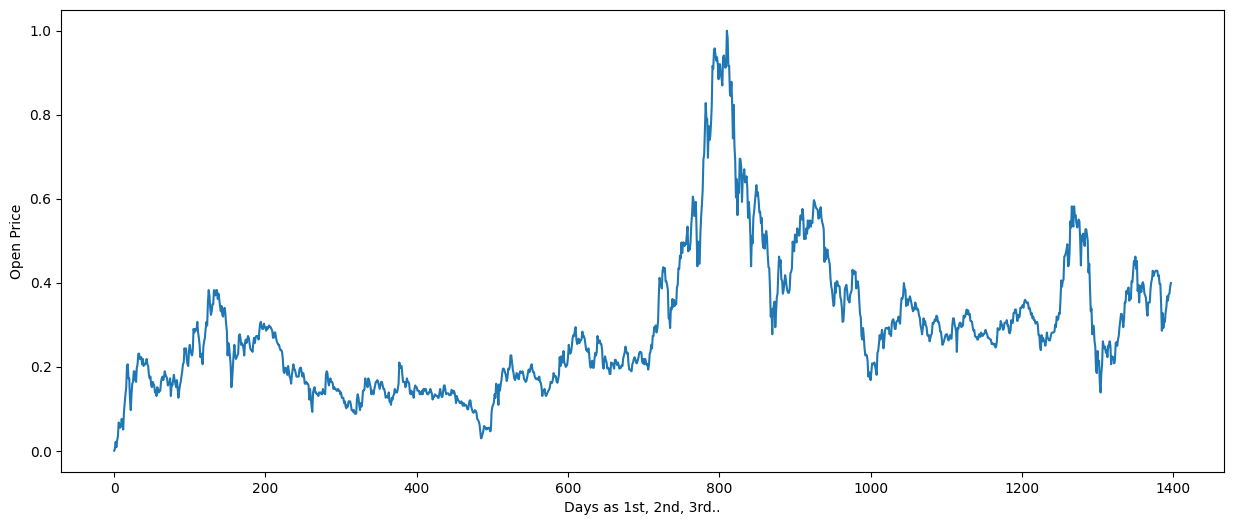

In [102]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [103]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [104]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1348, 50)
Shape of y_train before reshape : (1348,)


In [105]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1348, 50, 1)
Shape of y_train after reshape : (1348, 1)


In [106]:
X_train[0]

array([[0.        ],
       [0.00420171],
       [0.02100841],
       [0.00840335],
       [0.02521012],
       [0.03361347],
       [0.06722689],
       [0.06302524],
       [0.05462189],
       [0.05882353],
       [0.07563024],
       [0.06302524],
       [0.05042018],
       [0.09243701],
       [0.11344542],
       [0.13445377],
       [0.15126054],
       [0.20168066],
       [0.20588237],
       [0.17226895],
       [0.17226895],
       [0.12184877],
       [0.09663865],
       [0.13445377],
       [0.15966389],
       [0.16386554],
       [0.18907566],
       [0.18907566],
       [0.16806725],
       [0.16386554],
       [0.19747901],
       [0.20588237],
       [0.23109243],
       [0.23109243],
       [0.21848742],
       [0.22268907],
       [0.22268907],
       [0.20588237],
       [0.21848742],
       [0.20168066],
       [0.20588237],
       [0.20588237],
       [0.21008407],
       [0.21848742],
       [0.20588237],
       [0.20168066],
       [0.1806723 ],
       [0.172

In [107]:
y_train[0]

array([0.15126054])

In [108]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0000e+00 - loss: 0.5393
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.3409
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.2160
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.1993
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0010 - loss: 0.1136
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 7.9734e-04 - loss: 0.0892
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0790
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 7.0560e-04 - loss: 0.0633
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0024 - loss: 0.0466
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0378
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 7.9734e-04 - loss: 0.0407
Epoch 12/50
43/43 ━━━━━━━━━

In [109]:
# Losses
history.history["loss"]

[0.410238653421402,
 0.2966444194316864,
 0.2072676420211792,
 0.17901501059532166,
 0.10547592490911484,
 0.09238243103027344,
 0.07495821267366409,
 0.06146645545959473,
 0.04879600554704666,
 0.03894338384270668,
 0.038063861429691315,
 0.035155221819877625,
 0.030145132914185524,
 0.025244200602173805,
 0.022604363039135933,
 0.0225115567445755,
 0.01998669095337391,
 0.01771128550171852,
 0.013816588558256626,
 0.014909009449183941,
 0.014078079722821712,
 0.012624838389456272,
 0.011412225663661957,
 0.00975324958562851,
 0.009964827448129654,
 0.010142943821847439,
 0.008901485241949558,
 0.00769423320889473,
 0.007868355140089989,
 0.0069516547955572605,
 0.007137549575418234,
 0.006398094817996025,
 0.006376033183187246,
 0.005907293409109116,
 0.005612272769212723,
 0.005517701618373394,
 0.00559769943356514,
 0.005354812368750572,
 0.0049472288228571415,
 0.005326973274350166,
 0.0038195010274648666,
 0.00446650106459856,
 0.004493372980505228,
 0.004055014345794916,
 0.0040

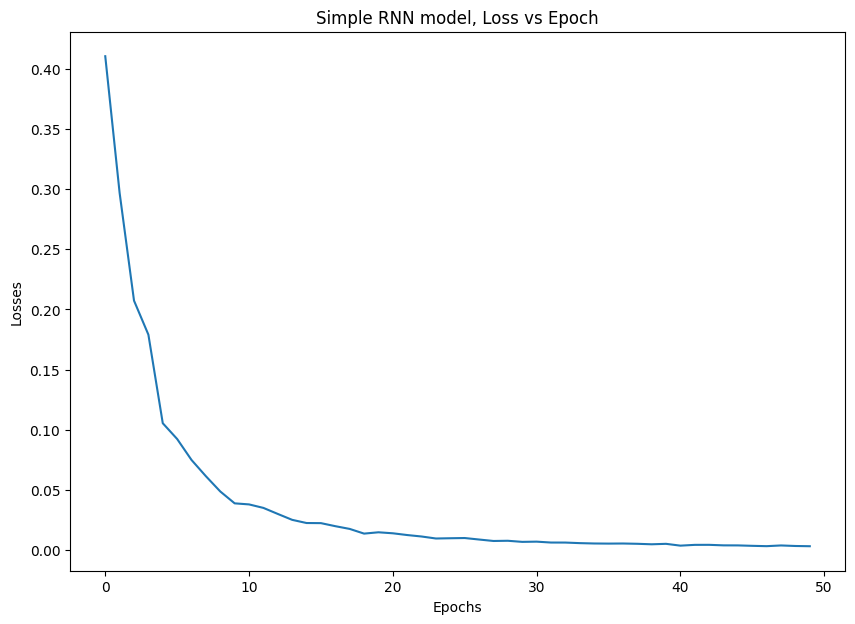

In [110]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

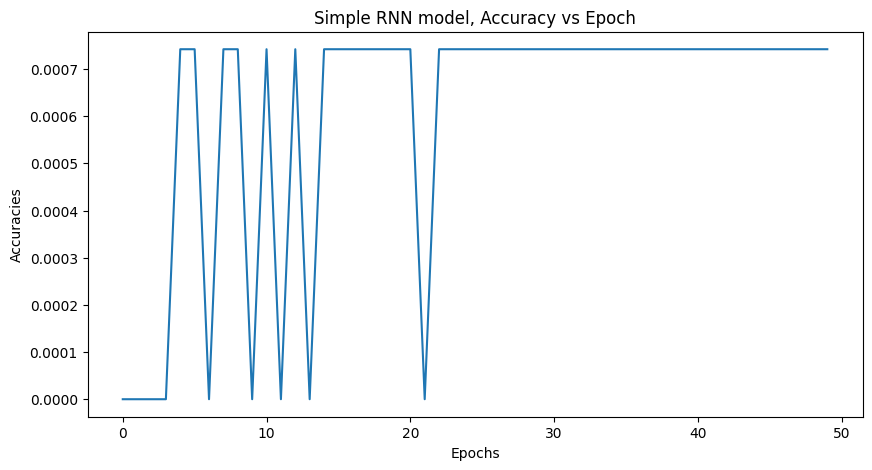

In [111]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [112]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


(1348, 1)

In [113]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1348, 1)

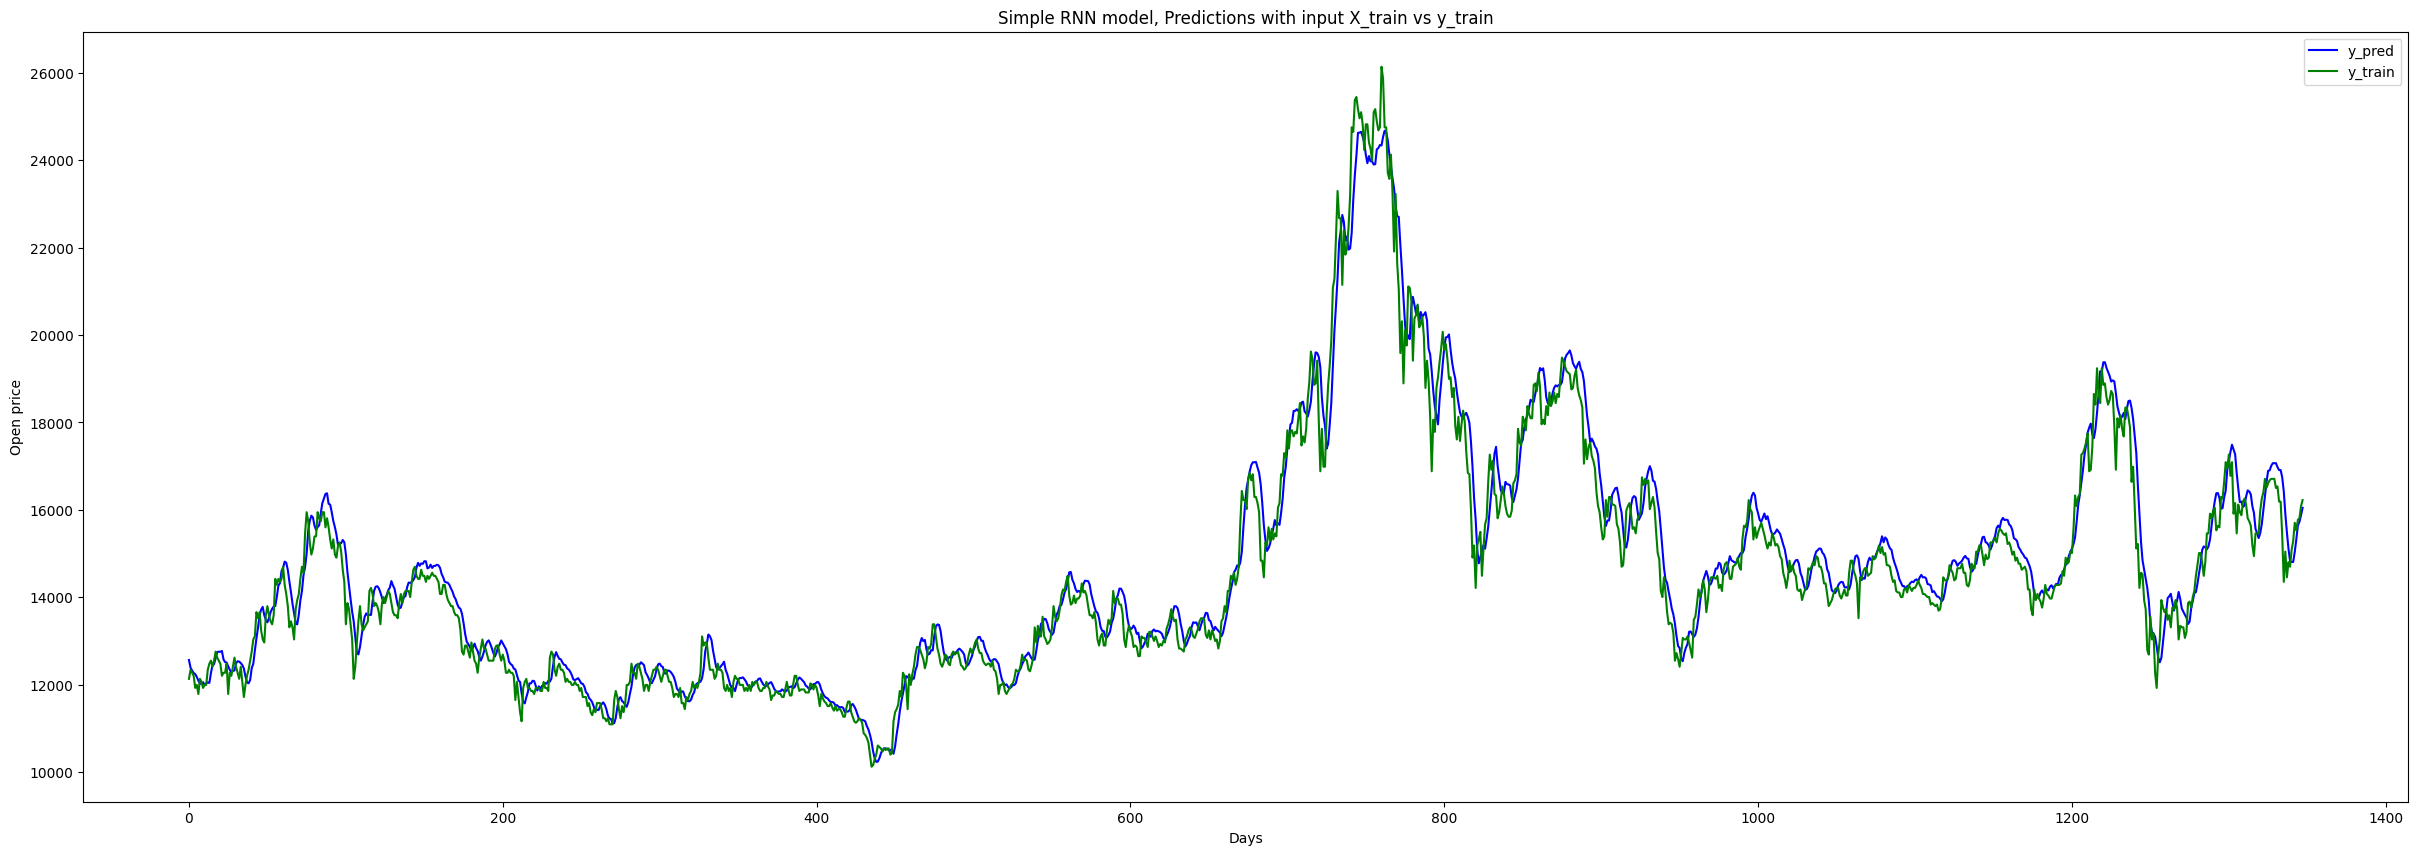

In [114]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [115]:
dataset_validation = validation_data.Close.values  # getting "close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (599, 1)


In [116]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [117]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [118]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (549, 50)
Shape of y_test before reshape : (549,)


In [119]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [120]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (549, 50, 1)
Shape of y_test after reshape : (549, 1)


In [121]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Shape of y_pred_of_test : (549, 1)


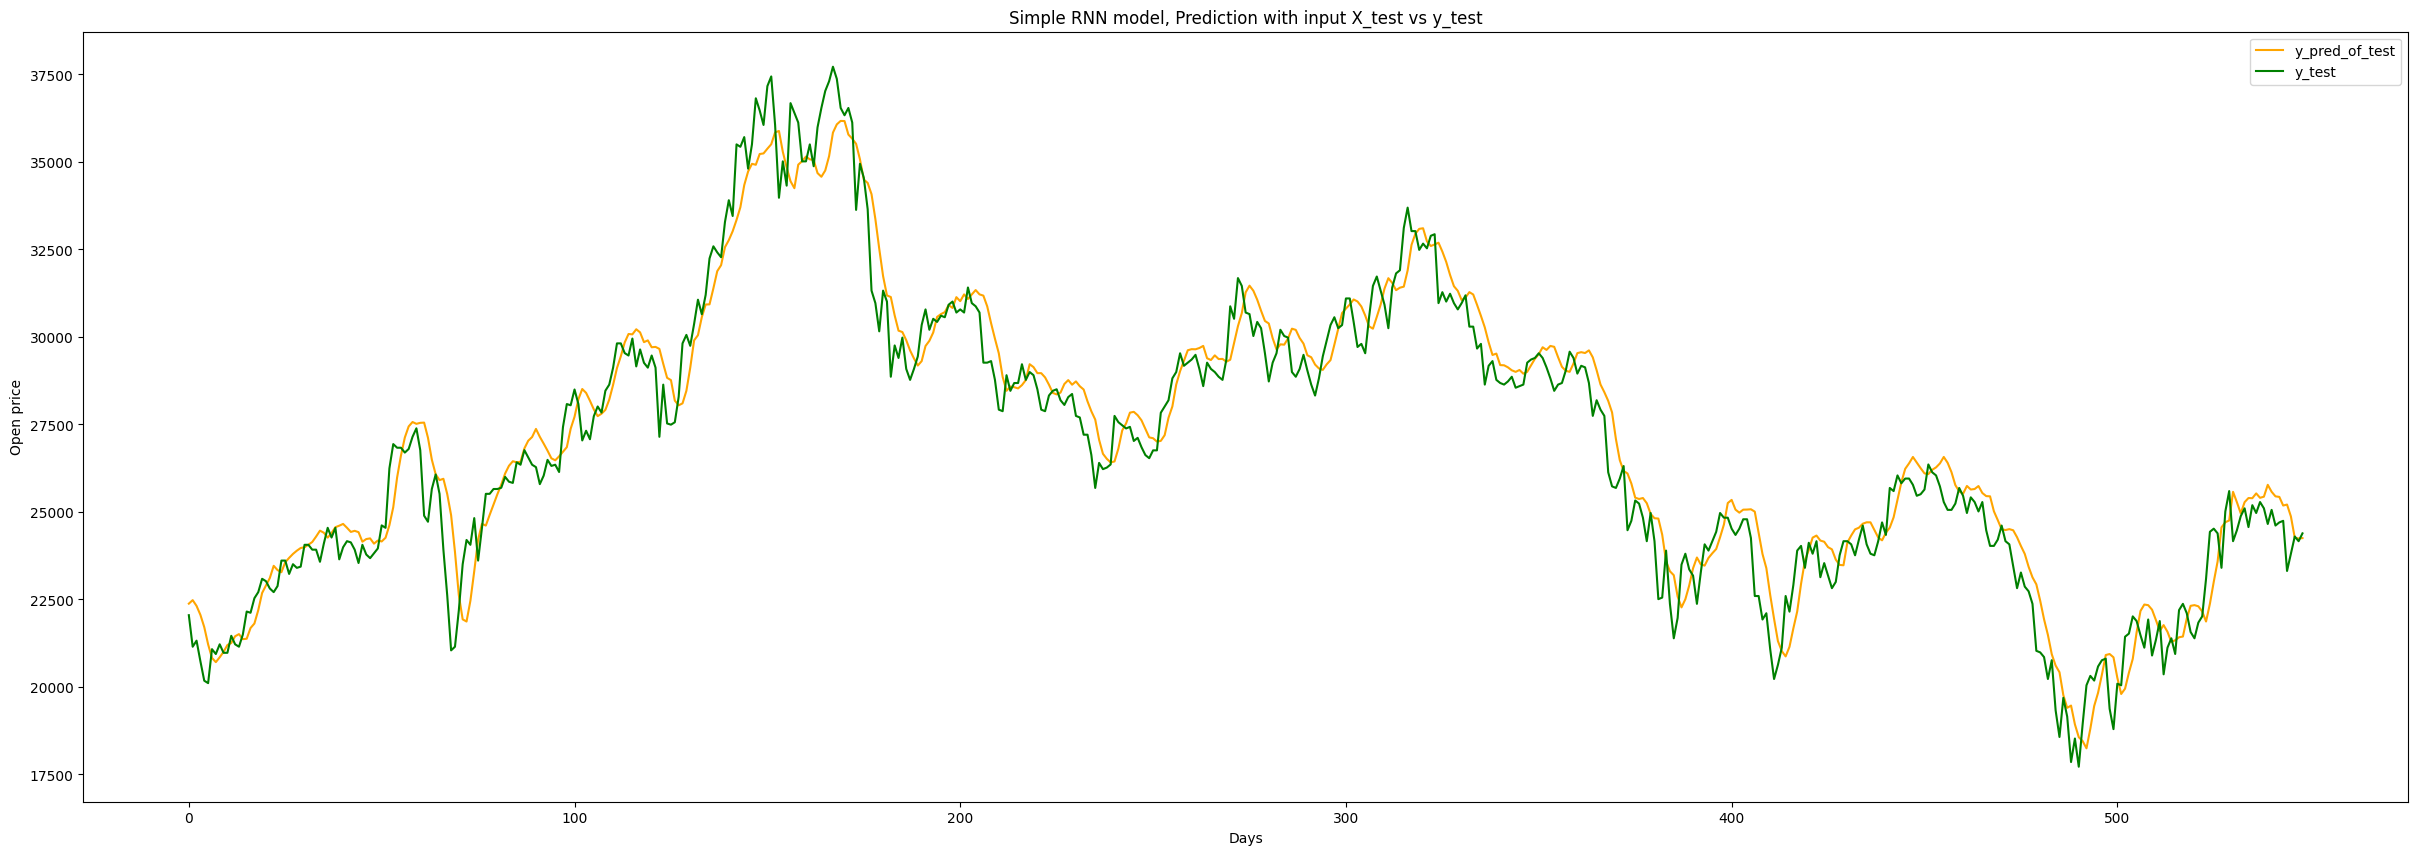

In [122]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

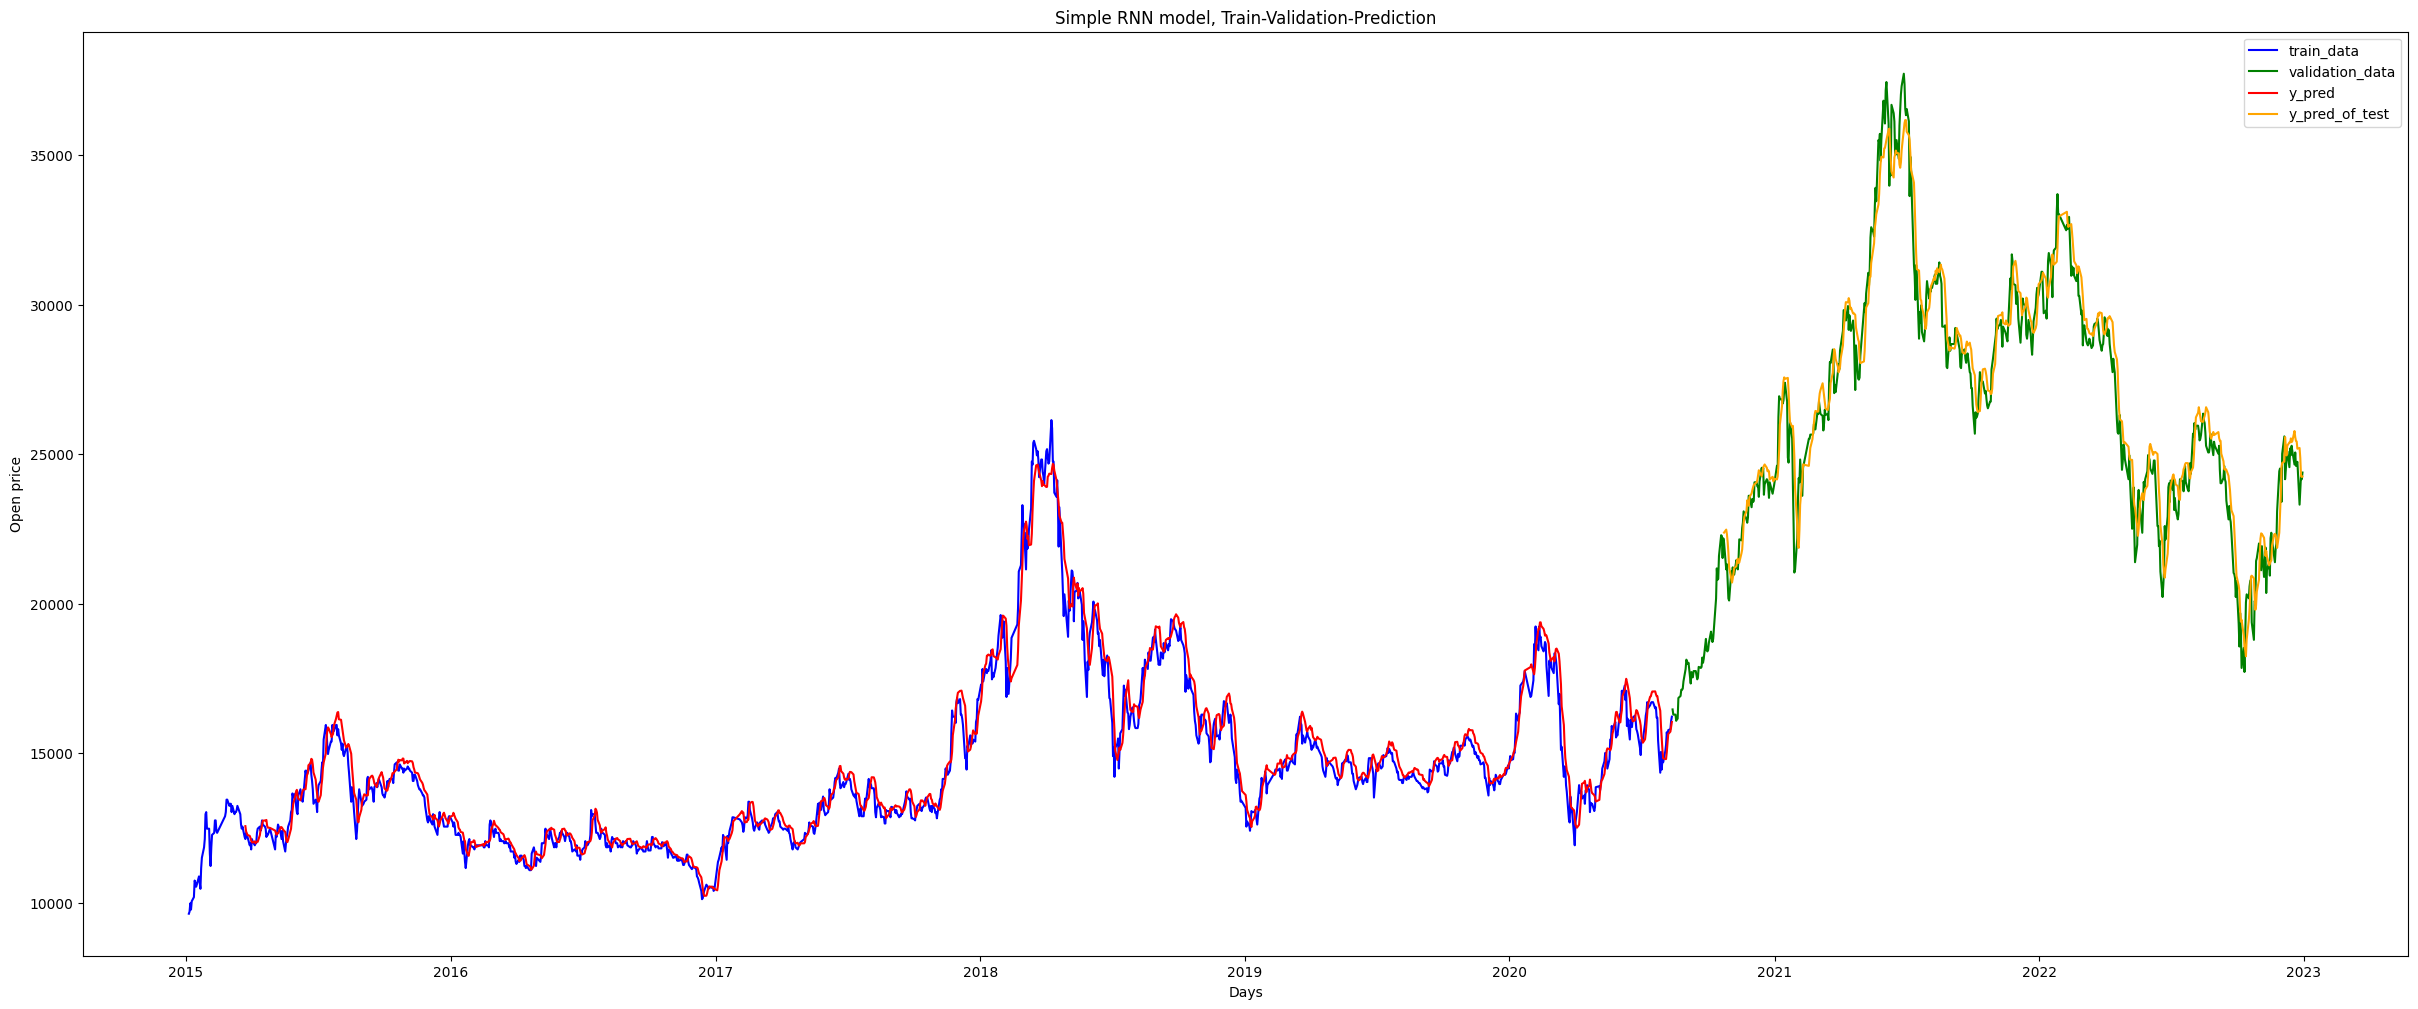

In [123]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Close, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Close, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## BID

In [124]:
data = pd.read_csv(bid_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,9101.712891,9172.269531,9101.712891,9101.712891,9101.712891,94080
1,2015-01-06,9031.157227,9383.936523,9031.157227,9313.380859,9313.380859,571418
2,2015-01-07,9313.380859,9595.604492,9242.825195,9595.604492,9595.604492,1177264
3,2015-01-08,9595.604492,9736.716797,9454.493164,9595.604492,9595.604492,1131356
4,2015-01-09,9595.604492,10230.608398,9595.604492,10230.608398,10230.608398,4664782


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1997 non-null   object 
 1   Open       1997 non-null   float64
 2   High       1997 non-null   float64
 3   Low        1997 non-null   float64
 4   Close      1997 non-null   float64
 5   Adj Close  1997 non-null   float64
 6   Volume     1997 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.3+ KB


In [126]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1997
Train data length : 1398
Validation data lenth : 599


In [127]:
data = data[['Date', 'Close']]

In [128]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close
0,2015-01-05,9101.712891
1,2015-01-06,9313.380859
2,2015-01-07,9595.604492
3,2015-01-08,9595.604492
4,2015-01-09,10230.608398
...,...,...
1393,2020-08-06,26987.638672
1394,2020-08-07,26881.804688
1395,2020-08-10,26881.804688
1396,2020-08-11,27164.027344


In [129]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close
1398,2020-08-13,27975.421875
1399,2020-08-14,27516.808594
1400,2020-08-17,27305.140625
1401,2020-08-18,27093.472656
1402,2020-08-19,27234.583984
...,...,...
1992,2022-12-26,34430.738281
1993,2022-12-27,35495.605469
1994,2022-12-28,37181.648438
1995,2022-12-29,35495.605469


In [130]:
dataset_train = train_data.Close.values
dataset_train.shape

(1398,)

In [131]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1398, 1)

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1398, 1)

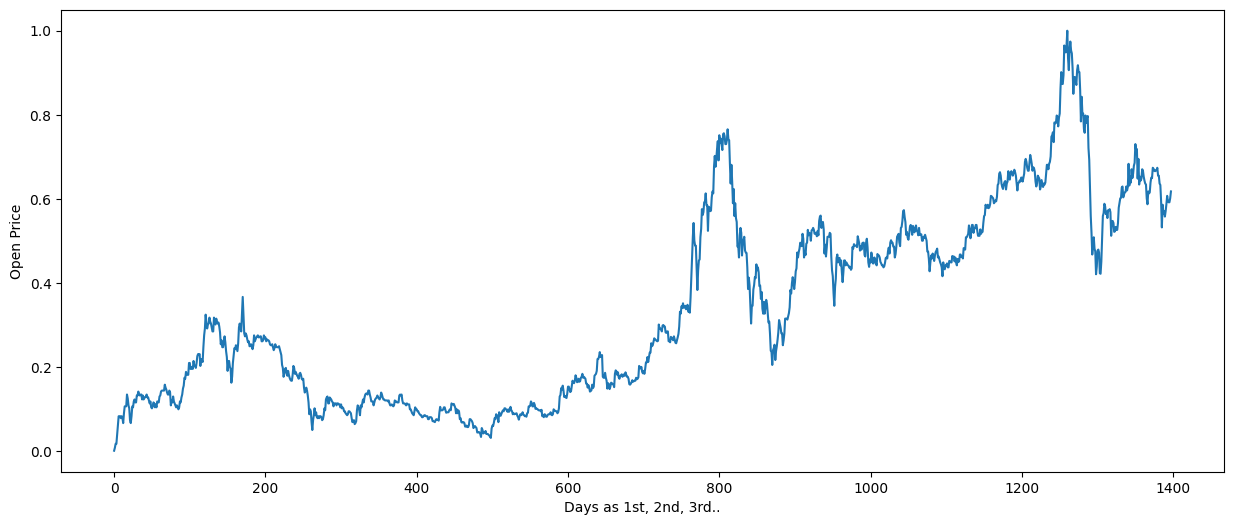

In [133]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [134]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [135]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1348, 50)
Shape of y_train before reshape : (1348,)


In [136]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1348, 50, 1)
Shape of y_train after reshape : (1348, 1)


In [137]:
X_train[0]

array([[0.        ],
       [0.00704226],
       [0.01643193],
       [0.01643193],
       [0.03755871],
       [0.06103287],
       [0.08215962],
       [0.07981221],
       [0.08215962],
       [0.0774648 ],
       [0.08215962],
       [0.0774648 ],
       [0.06572772],
       [0.08920188],
       [0.10563381],
       [0.10563381],
       [0.10563381],
       [0.13380282],
       [0.12441315],
       [0.10798122],
       [0.10093899],
       [0.07276995],
       [0.06572772],
       [0.08215962],
       [0.10563381],
       [0.1032864 ],
       [0.11737089],
       [0.12206574],
       [0.11502348],
       [0.11502348],
       [0.13145541],
       [0.13145541],
       [0.14084508],
       [0.13380282],
       [0.13145541],
       [0.13380282],
       [0.13380282],
       [0.12206574],
       [0.13145541],
       [0.12206574],
       [0.12676056],
       [0.12676056],
       [0.129108  ],
       [0.13380282],
       [0.12676056],
       [0.12676056],
       [0.11971833],
       [0.112

In [138]:
y_train[0]

array([0.10093899])

In [139]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 1.6153e-04 - loss: 0.3777
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.2202
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 4.2490e-04 - loss: 0.1217
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 7.4999e-04 - loss: 0.1025
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 7.4999e-04 - loss: 0.0686
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0016 - loss: 0.0521
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 7.0560e-04 - loss: 0.0434
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 7.4999e-04 - loss: 0.0342
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 5.8699e-04 - loss: 0.0256
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0016 - loss: 0.0234
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0031 - loss: 0.0203
Epoch 12/50
43/43 ━━━━━━━━━━━━━

In [140]:
# Losses
history.history["loss"]

[0.3117765188217163,
 0.19619619846343994,
 0.1204182431101799,
 0.0951201468706131,
 0.06311662495136261,
 0.04806384816765785,
 0.042378492653369904,
 0.03131774440407753,
 0.023912927135825157,
 0.022540297359228134,
 0.02194877341389656,
 0.017627084627747536,
 0.014922344125807285,
 0.014827079139649868,
 0.012156445533037186,
 0.011051422916352749,
 0.010323721915483475,
 0.009230212308466434,
 0.009002262726426125,
 0.006842017639428377,
 0.00694672716781497,
 0.006472994573414326,
 0.006242524366825819,
 0.006493647117167711,
 0.005966348573565483,
 0.00564702320843935,
 0.0050162277184426785,
 0.004935821518301964,
 0.005370236933231354,
 0.004536869470030069,
 0.004238604102283716,
 0.00408931402489543,
 0.003867289749905467,
 0.004063006490468979,
 0.0035222037695348263,
 0.0039050430059432983,
 0.0037723847199231386,
 0.003294606925919652,
 0.0032361617777496576,
 0.003238676581531763,
 0.0032036255579441786,
 0.0034533191937953234,
 0.0026117514353245497,
 0.00287336437031

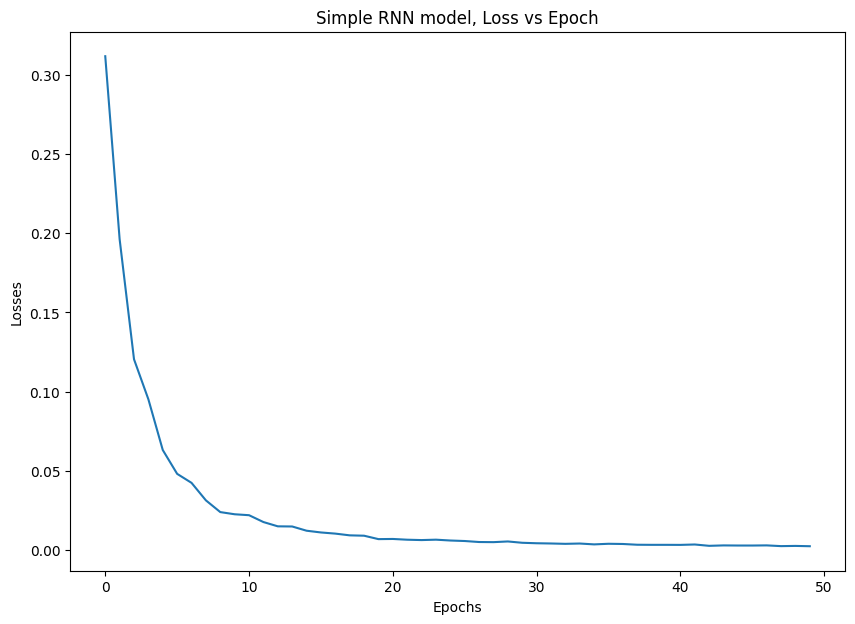

In [141]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

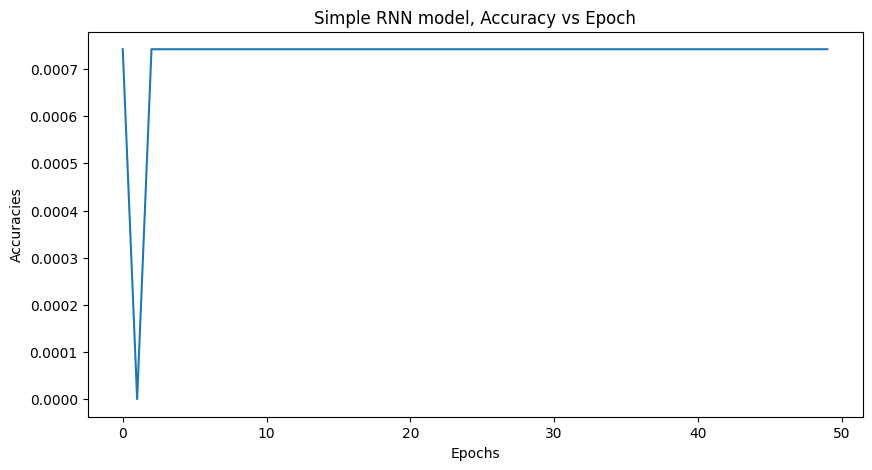

In [142]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [143]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


(1348, 1)

In [144]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1348, 1)

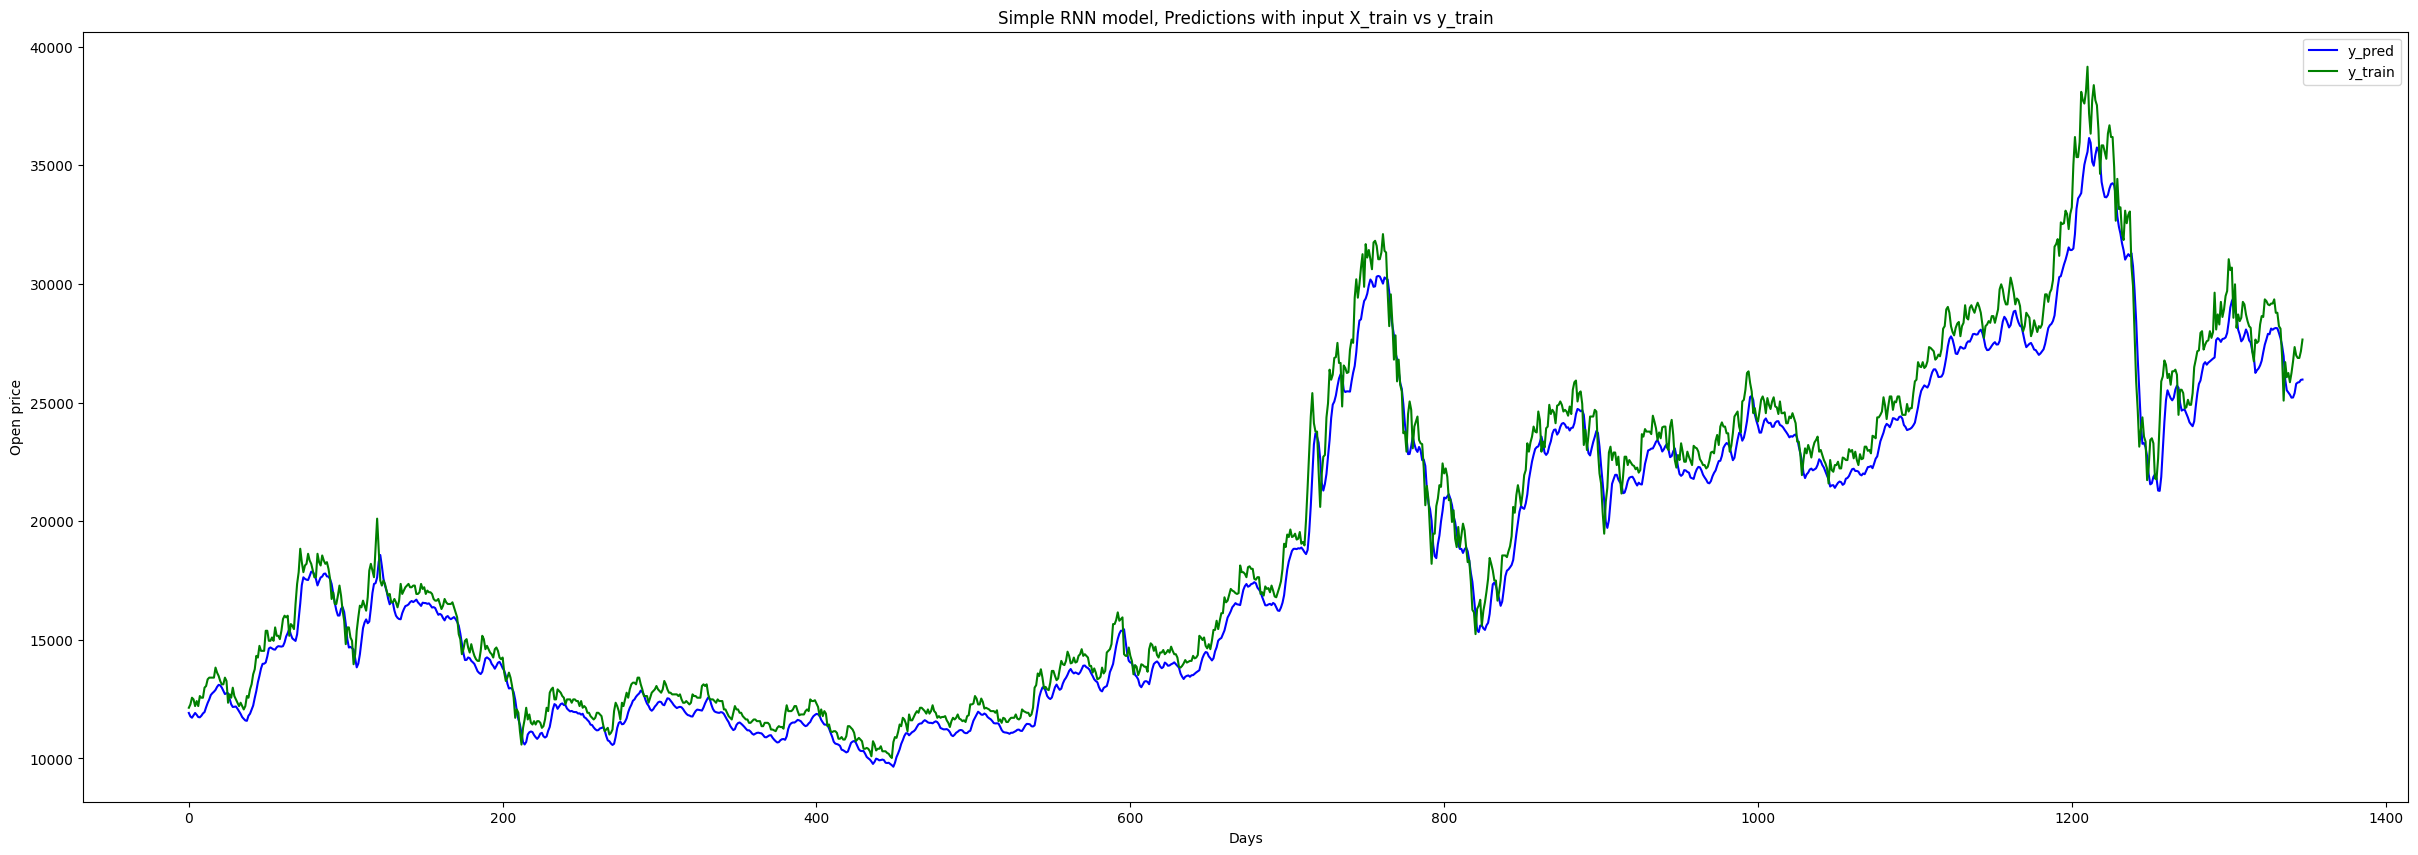

In [145]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [146]:
dataset_validation = validation_data.Close.values  # getting "close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (599, 1)


In [147]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [148]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [149]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (549, 50)
Shape of y_test before reshape : (549,)


In [150]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [151]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (549, 50, 1)
Shape of y_test after reshape : (549, 1)


In [152]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Shape of y_pred_of_test : (549, 1)


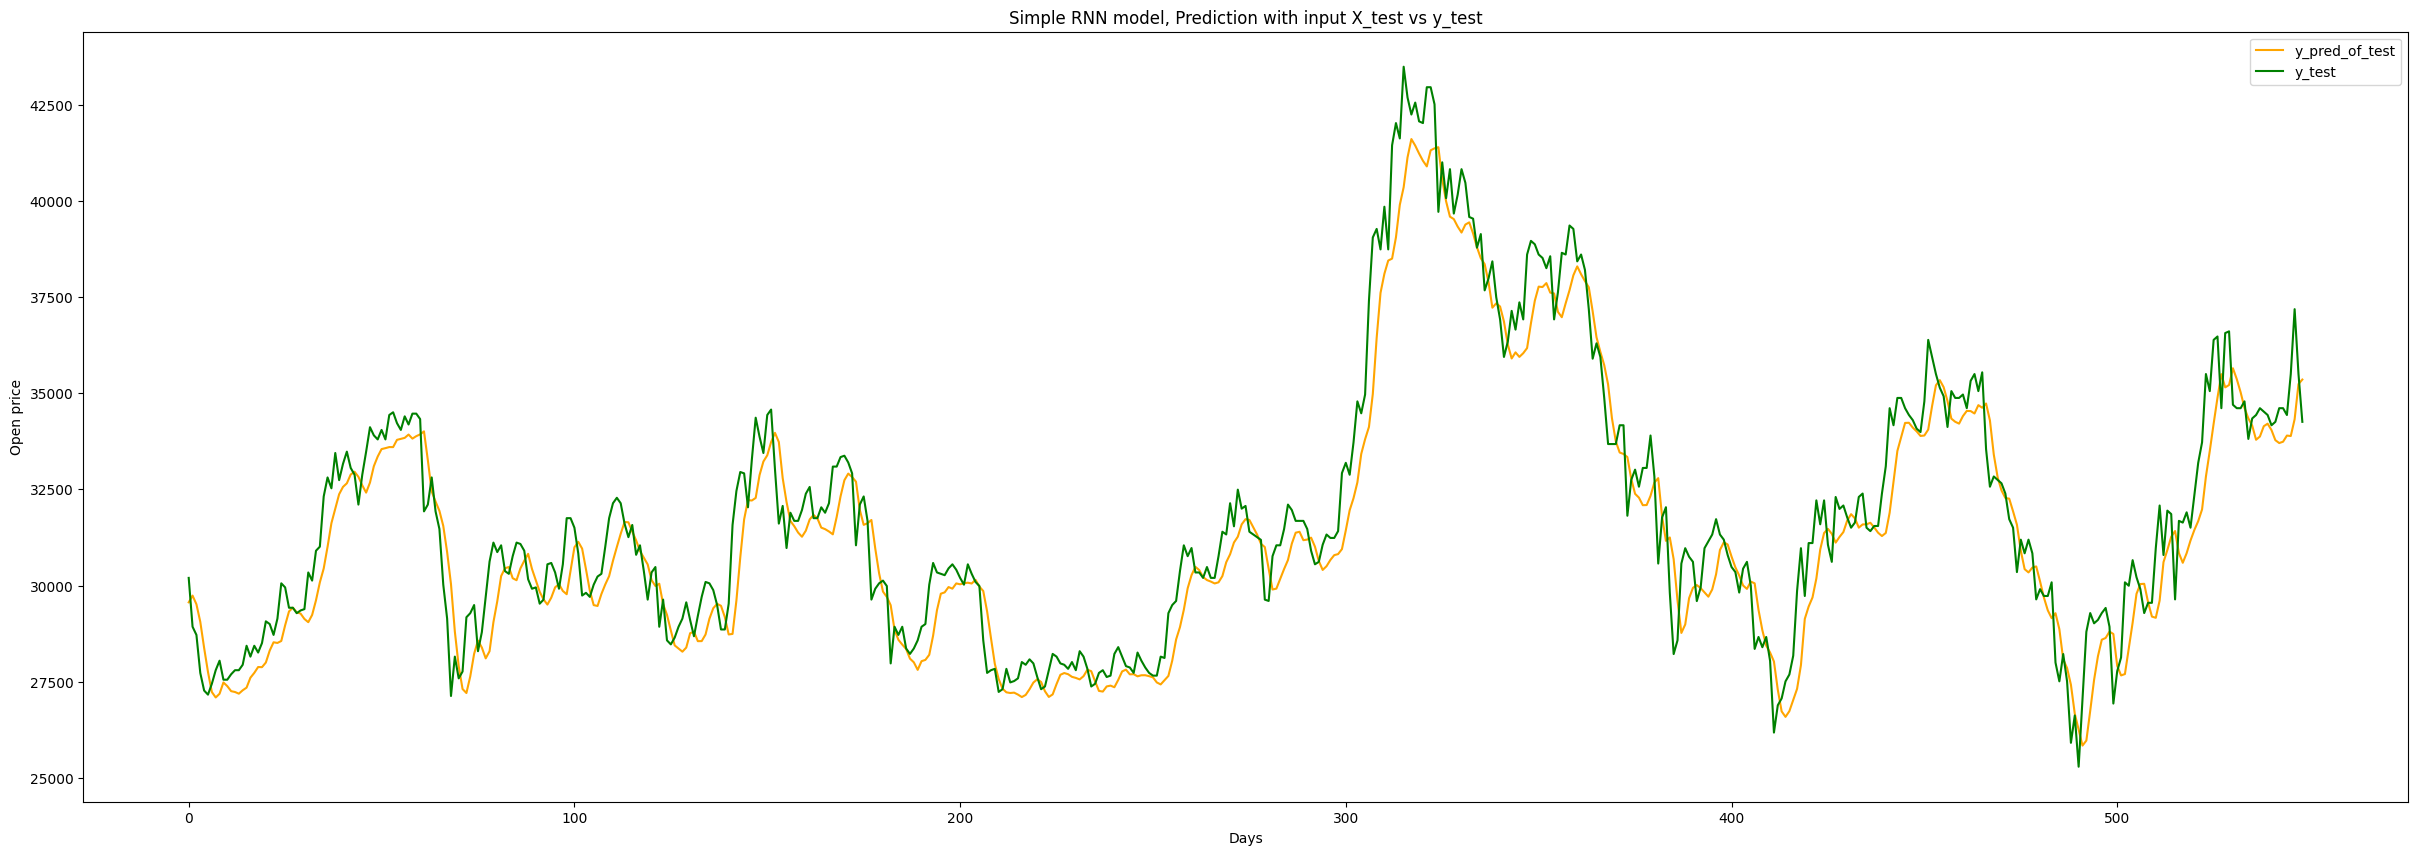

In [153]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

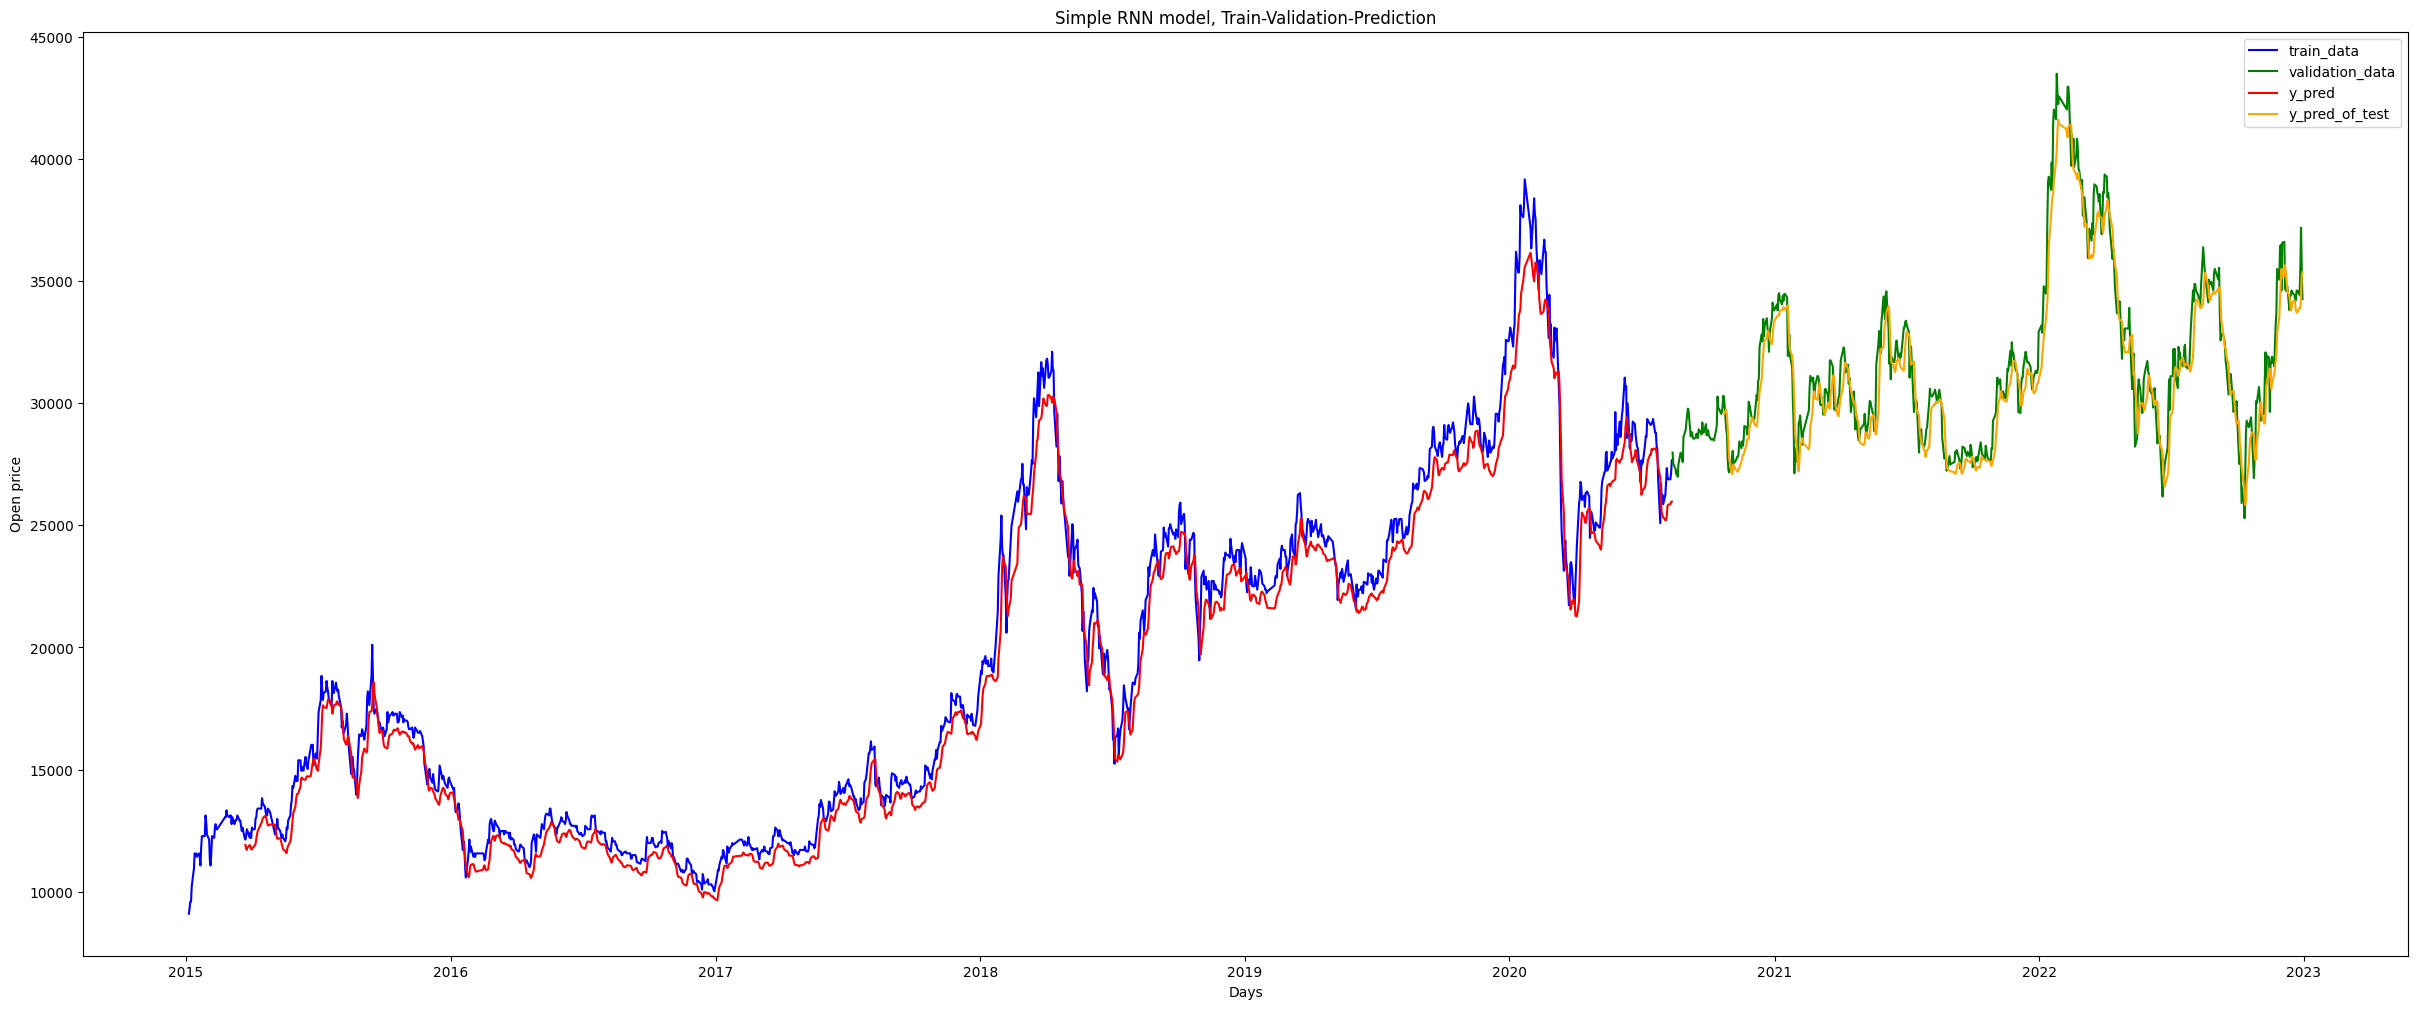

In [154]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Close, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Close, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## VCB

In [155]:
data = pd.read_csv(vcb_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,15582.061523,15778.680664,15434.597656,15680.371094,15680.371094,630678
1,2015-01-06,15680.371094,16712.621094,15680.371094,16712.621094,16712.621094,3427132
2,2015-01-07,16761.775391,17007.550781,16270.228516,16516.001953,16516.001953,3182476
3,2015-01-08,16565.156250,17204.169922,16516.001953,17007.550781,17007.550781,2043014
4,2015-01-09,17155.013672,18187.263672,17155.013672,18138.109375,18138.109375,5155103


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1997 non-null   object 
 1   Open       1997 non-null   float64
 2   High       1997 non-null   float64
 3   Low        1997 non-null   float64
 4   Close      1997 non-null   float64
 5   Adj Close  1997 non-null   float64
 6   Volume     1997 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.3+ KB


In [157]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1997
Train data length : 1398
Validation data lenth : 599


In [158]:
data = data[['Date', 'Close']]

In [159]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close
0,2015-01-05,15680.371094
1,2015-01-06,16712.621094
2,2015-01-07,16516.001953
3,2015-01-08,17007.550781
4,2015-01-09,18138.109375
...,...,...
1393,2020-08-06,54945.199219
1394,2020-08-07,55011.558594
1395,2020-08-10,54347.968750
1396,2020-08-11,54480.687500


In [160]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close
1398,2020-08-13,55077.917969
1399,2020-08-14,54414.328125
1400,2020-08-17,54613.406250
1401,2020-08-18,54613.406250
1402,2020-08-19,55077.917969
...,...,...
1992,2022-12-26,66807.789062
1993,2022-12-27,66977.140625
1994,2022-12-28,67739.203125
1995,2022-12-29,68331.921875


In [161]:
dataset_train = train_data.Close.values
dataset_train.shape

(1398,)

In [162]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1398, 1)

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1398, 1)

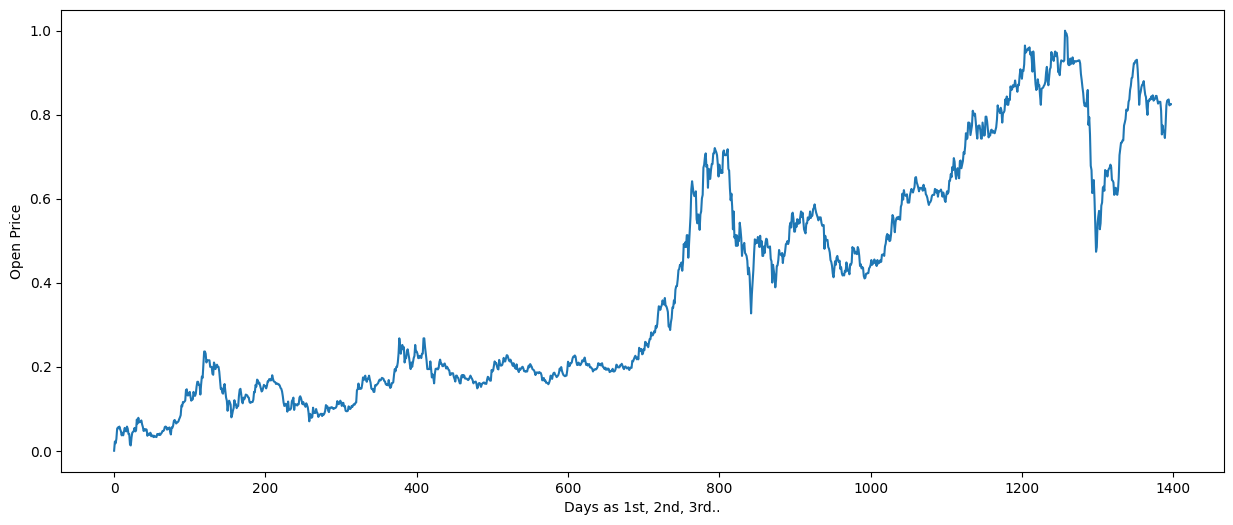

In [164]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [165]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [166]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1348, 50)
Shape of y_train before reshape : (1348,)


In [167]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1348, 50, 1)
Shape of y_train after reshape : (1348, 1)


In [168]:
X_train[0]

array([[0.        ],
       [0.0219493 ],
       [0.01776848],
       [0.02822056],
       [0.05226025],
       [0.05539588],
       [0.05330545],
       [0.05748627],
       [0.05121506],
       [0.04598904],
       [0.0365822 ],
       [0.04285341],
       [0.0365822 ],
       [0.04494385],
       [0.05435069],
       [0.04912463],
       [0.04598904],
       [0.05748627],
       [0.05226025],
       [0.03971779],
       [0.03971779],
       [0.01463288],
       [0.01254247],
       [0.03135614],
       [0.04285341],
       [0.04494385],
       [0.04703424],
       [0.05435069],
       [0.04598904],
       [0.04807943],
       [0.07420956],
       [0.06480272],
       [0.07839038],
       [0.06793835],
       [0.06793835],
       [0.06898354],
       [0.07211917],
       [0.06271233],
       [0.05644108],
       [0.04703424],
       [0.05121506],
       [0.04807943],
       [0.05121506],
       [0.05016986],
       [0.03553697],
       [0.03971779],
       [0.04076302],
       [0.037

In [169]:
y_train[0]

array([0.03553697])

In [170]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 1.6153e-04 - loss: 0.4757
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 3.9649e-04 - loss: 0.2019
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 6.6383e-04 - loss: 0.1287
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.1076
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0792
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 2.9302e-04 - loss: 0.0596
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0507
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 7.4999e-04 - loss: 0.0426
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0013 - loss: 0.0317
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 4.8537e-04 - loss: 0.0250
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.2261e-04 - loss: 0.0234
Epoch 12/50
43/43 ━━━━━

In [171]:
# Losses
history.history["loss"]

[0.33564260601997375,
 0.18321068584918976,
 0.11849674582481384,
 0.09670183062553406,
 0.07106376439332962,
 0.059409767389297485,
 0.048912595957517624,
 0.04038019850850105,
 0.030459247529506683,
 0.02647363767027855,
 0.022257454693317413,
 0.023503925651311874,
 0.01922532357275486,
 0.01482998114079237,
 0.014637056738138199,
 0.014197754673659801,
 0.01345629058778286,
 0.010912313126027584,
 0.011908610351383686,
 0.010040851309895515,
 0.009479723870754242,
 0.009409775026142597,
 0.007399899419397116,
 0.008655994199216366,
 0.007481197360903025,
 0.007324559614062309,
 0.0070091248489916325,
 0.006500233430415392,
 0.006891428027302027,
 0.0059082284569740295,
 0.005828196182847023,
 0.00534776970744133,
 0.005238630808889866,
 0.00489319721236825,
 0.00505786994472146,
 0.004457511939108372,
 0.004323204979300499,
 0.004600582178682089,
 0.004166554659605026,
 0.00440032035112381,
 0.0038161531556397676,
 0.0038889863062649965,
 0.0038403100334107876,
 0.00403915857896208

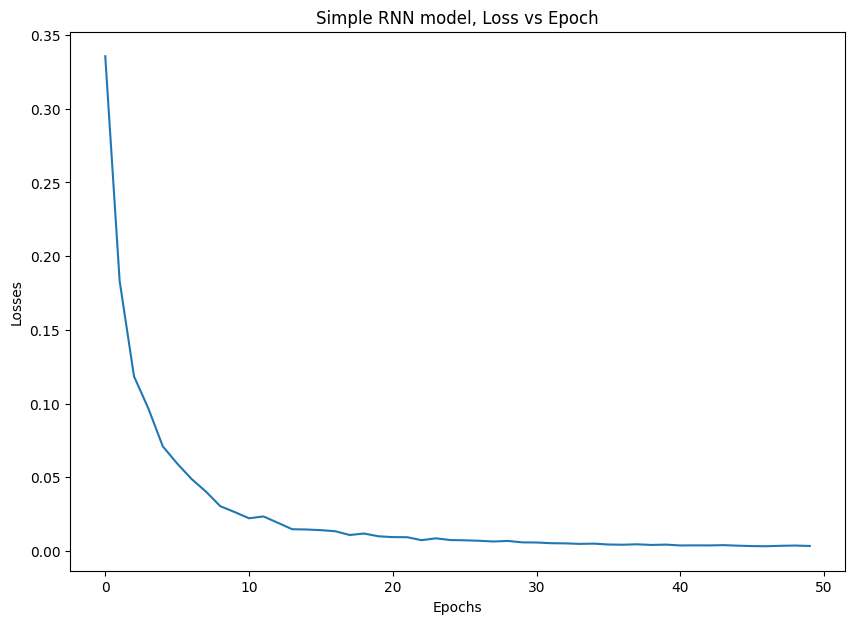

In [172]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

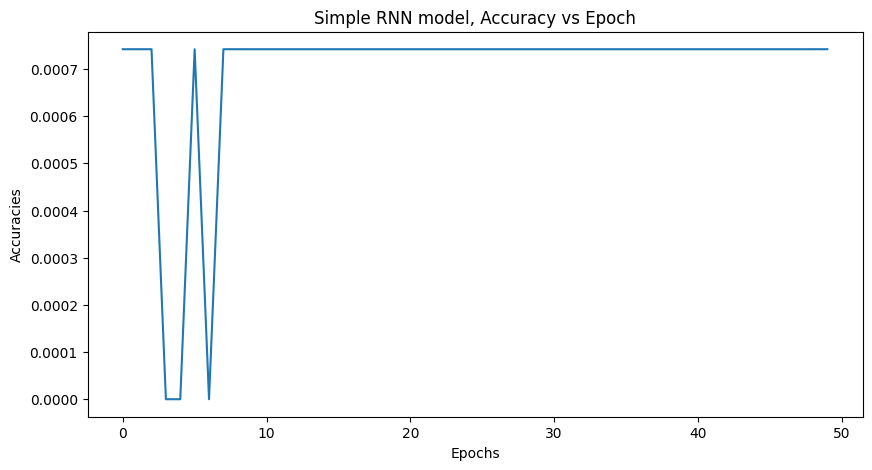

In [173]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [174]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


(1348, 1)

In [175]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1348, 1)

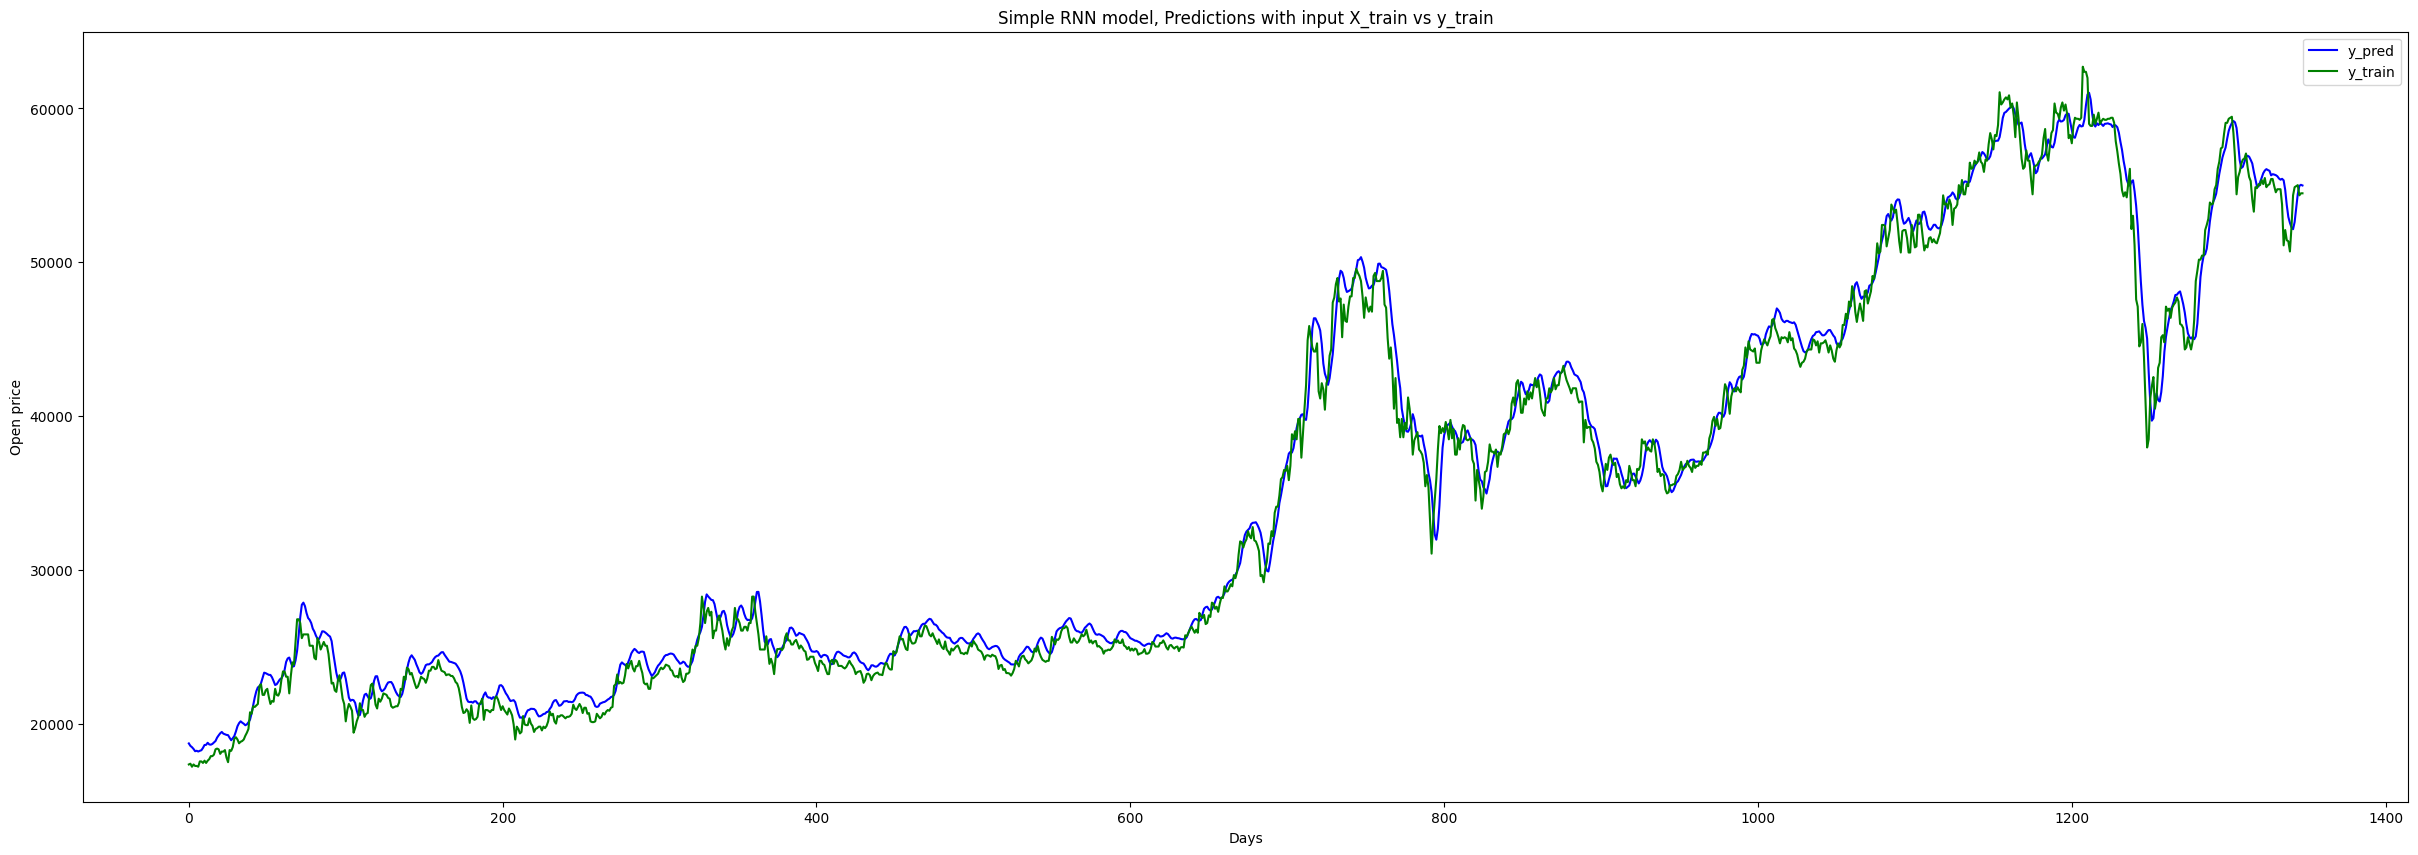

In [176]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [177]:
dataset_validation = validation_data.Close.values  # getting "close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (599, 1)


In [178]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [179]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [180]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (549, 50)
Shape of y_test before reshape : (549,)


In [181]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [182]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (549, 50, 1)
Shape of y_test after reshape : (549, 1)


In [183]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Shape of y_pred_of_test : (549, 1)


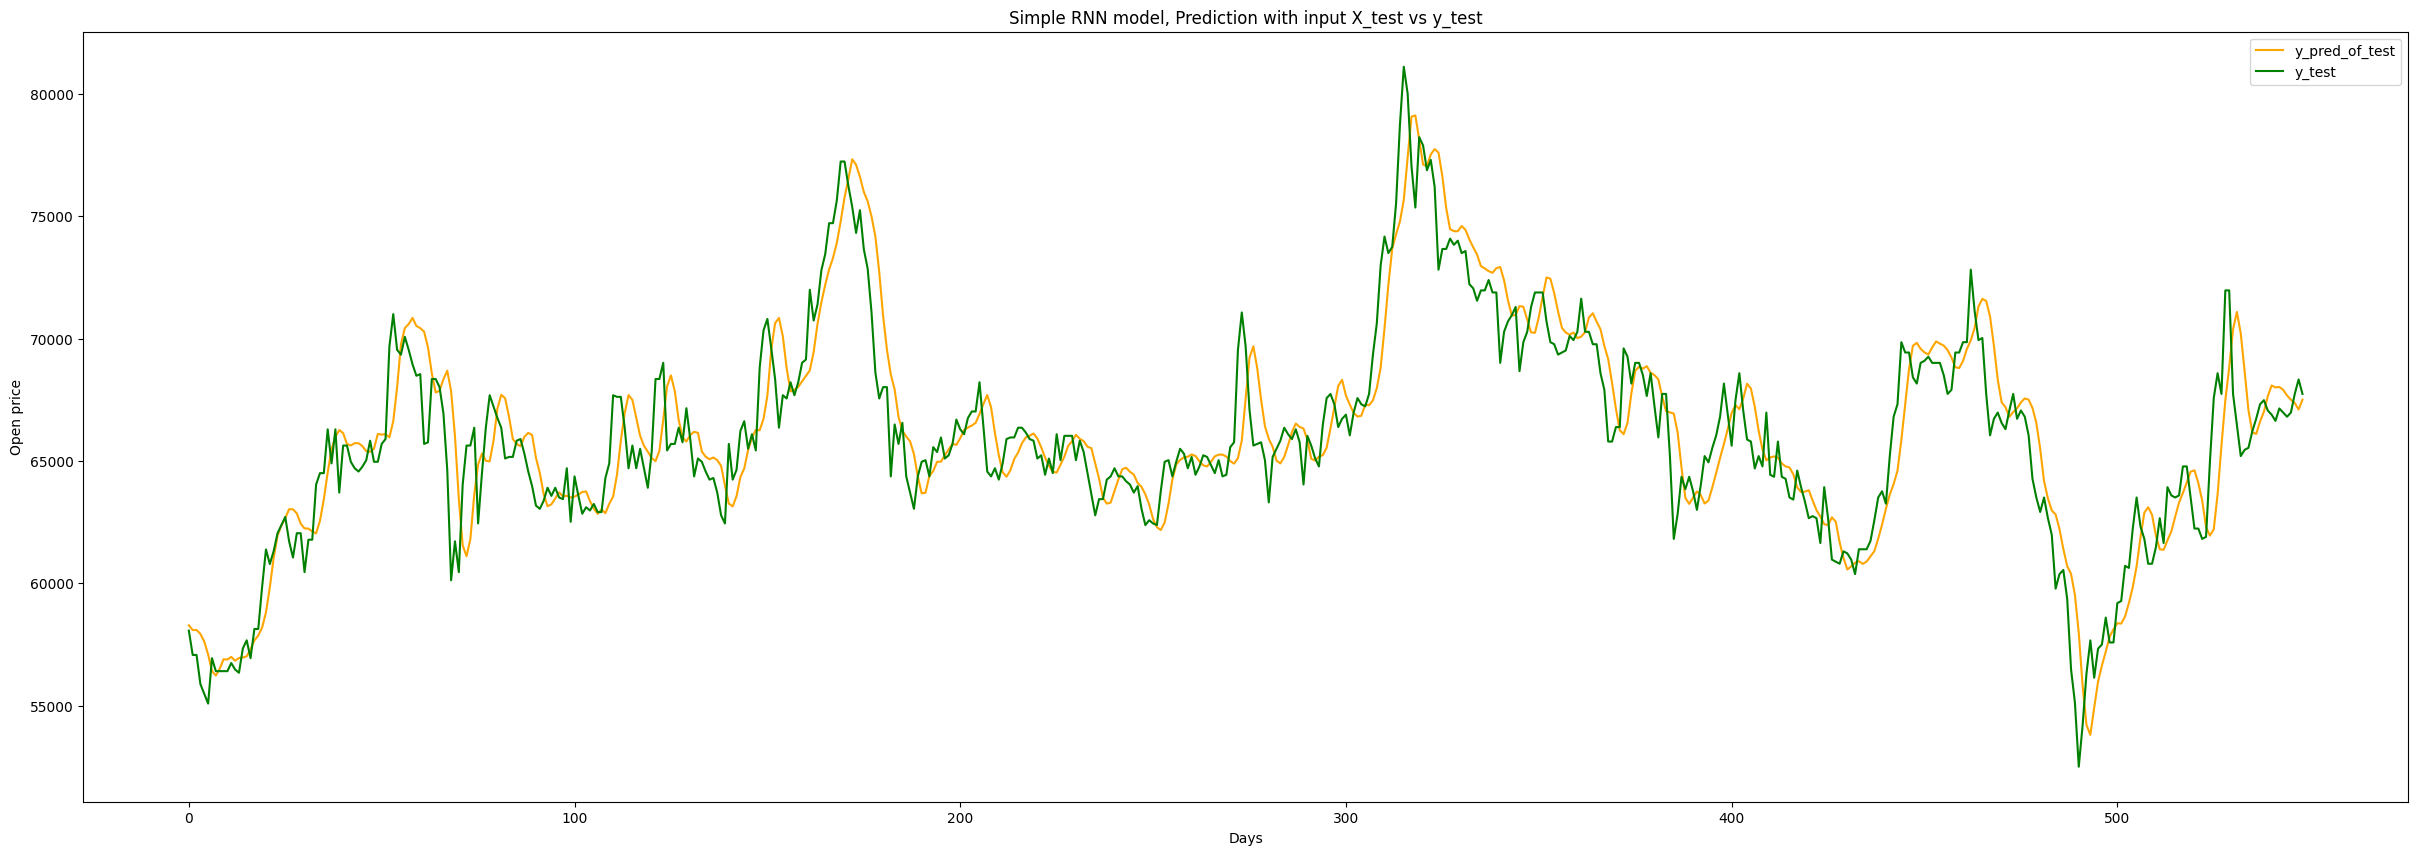

In [184]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

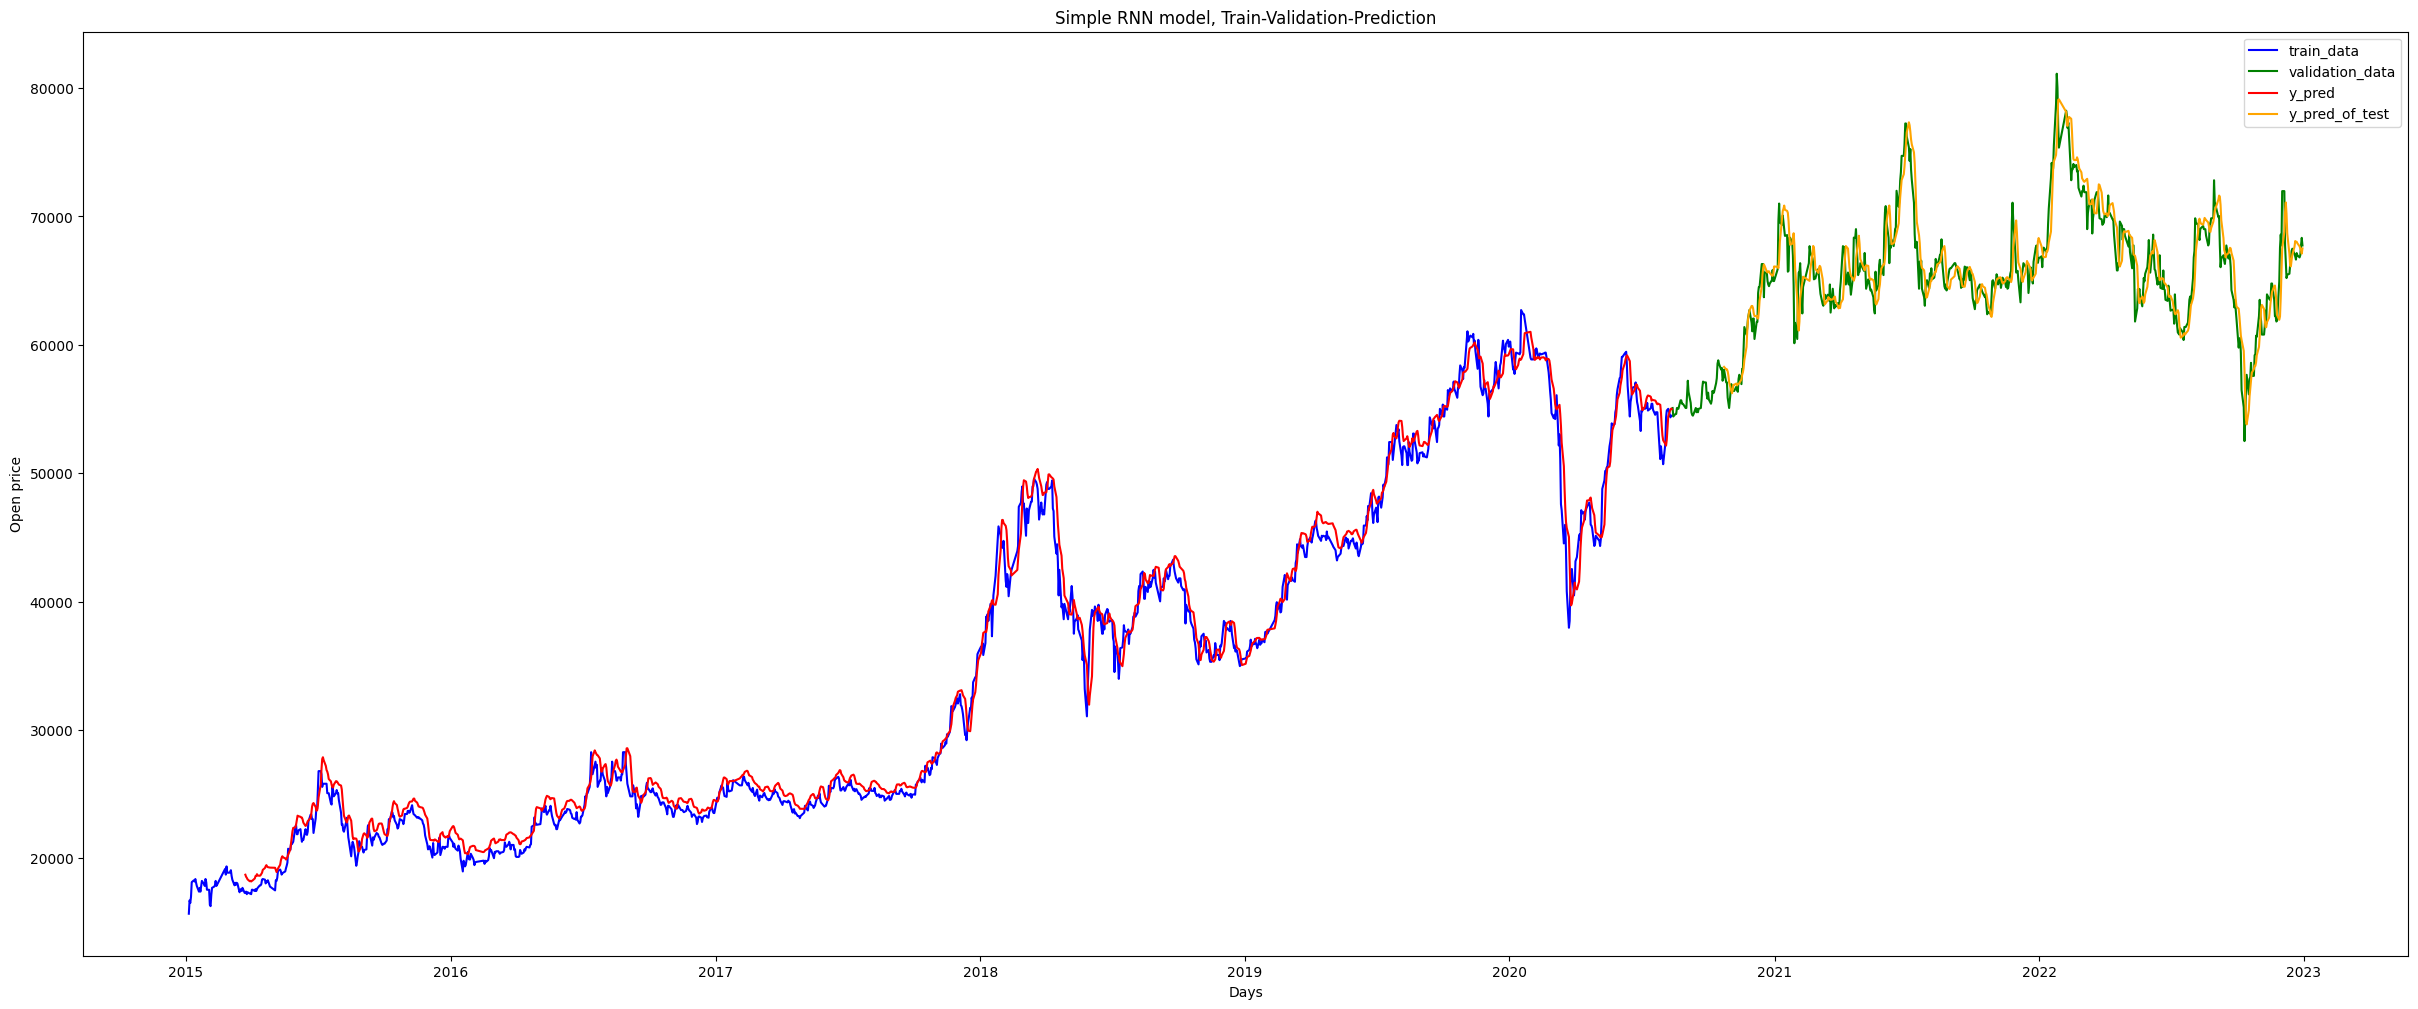

In [185]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Close, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Close, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()